# Dimensionality Reduction and Clustering

For this homework, I will be working with the MNIST dataset, which consists of hand drawn images ranging from 0 to 9. Each image is 28x28 pixels. Each pixel has a value between 0 and 255, higher values indicating greater darkness in the pixel. 

This homework is designed to help us explore dimensionality reduction and clustering as discussed in class. Each sections will answer a few stated questions that are tied to the homework. 

## Table of Contents
- PCA
- t-SNE
- K-Means Clustering
- Hierarchical Clustering 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Retrieving data for dimensionality reduction and clustering
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

## Principle Component Analysis (PCA)

Use PCA to reduce the dimensionality

**a) How many components did you use? Why?**

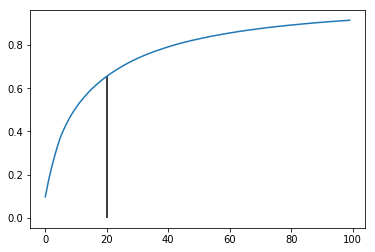

In [3]:
#Graphing cumulative variance capture ratio, aggregated as number of principle components increase
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)

It looks like a good amount of components to use could be 20, but that will only capture about 70% of the variance. I will check to see how many components are required to capture 80% of the variance.

In [4]:
index_80 = np.argmax(cum_ratio >= 0.8)
print(index_80)
print(cum_ratio[index_80])

42
0.8001734829310247


I like the way that is looking so far. I will choose 42 components to run PCA since it will capture 80% of the variance in my data. To capture more variance beyond that point will require a large increase in principle components, so this seems like a happy medium and a good place to stop. 

**b) Plot the first two components. Do you notice any trends? What is this plot showing us?**

Text(0.5, 1.0, 'First 2 Principle Components')

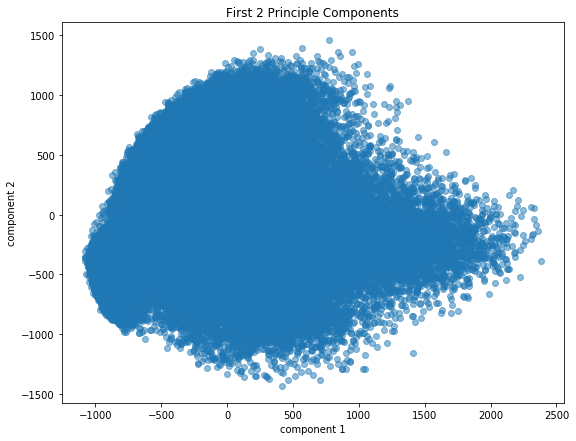

In [5]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(X)

f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('First 2 Principle Components')

There doesn't seem to be much of a trend, except for the data to be a bit more concentrated where each component is closer to 0. 

The plot is showing us the variance among the data points between the first and second components.

**c) Why would you use PCA? What is it doing? And what are the drawbacks?**

PCA is used to reduce the dimensionality of your data. This could be useful when you have data with high dimensionality but you are feeding it into a model that does not do well with high dimensional data.

PCA is a technique that projects the data onto the axes with the highest variance. The first component will capture the most variance, the second will capture the next most, and so on. 

There are a few drawbacks to using PCA. First off, it isn't that useful nowadays because most algorithms can handle high dimensional data. Since the dimensions are being reduced, feature importance won't be usable in the model, thus hindering your ability to interpret what the model is doing. 

**d) Plot some of the images, then compress them using PCA and plot again. How does it look?**

In [6]:
#Function that plots the image data. Adapted from ngriffiths13 function used for this homework
def plot_digits(data):
    fig, axes = plt.subplots(2, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

def plot_digits_comp(data):
    fig, axes = plt.subplots(2, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(6, 7),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

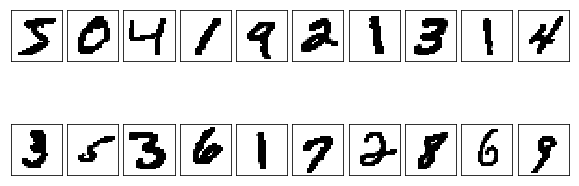

In [7]:
plot_digits(X)

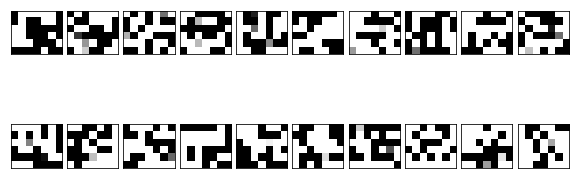

In [8]:
pca = PCA(n_components = 42)
x_pca = pca.fit_transform(X)
plot_digits_comp(x_pca)

The compressed images cannot even be interpreted. The uncompressed images are pretty clear. 

## t-SNE

Use t-SNE to plot the first two components (you should probably random sample around 10000 points)

**a) How does this plot differ from your PCA plot?**

In [9]:
rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 1000

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.006s...
[t-SNE] Computed neighbors for 1000 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 508.780804
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.077934
[t-SNE] KL divergence after 1000 iterations: 0.940928


Text(0.5, 1.0, 'TSNE')

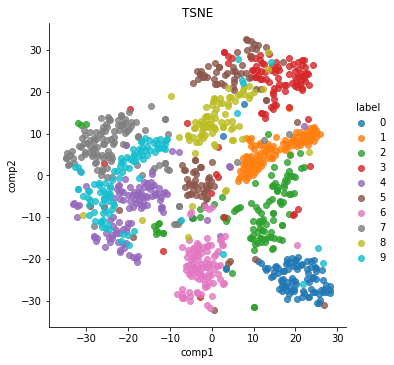

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('TSNE')

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 516.132765
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.494038
[t-SNE] KL divergence after 1000 iterations: 0.968610


Text(0.5, 1.0, 'T-SNE')

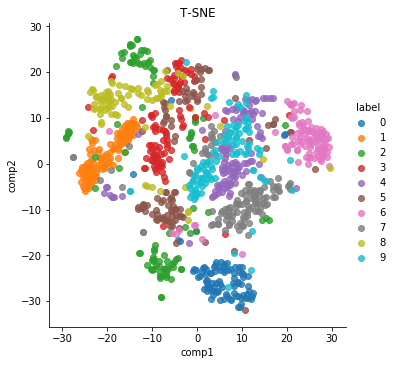

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE')

This plot has separate clusters for the different labels. The data points are more spread out and distinguishable. There is quite a bit of overlap between the groups.

**b) How robust is it to changes in perplexity?**

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.088s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 473.237553
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.170929
[t-SNE] KL divergence after 1000 iterations: 0.977810


Text(0.5, 1.0, 'perplexity 25')

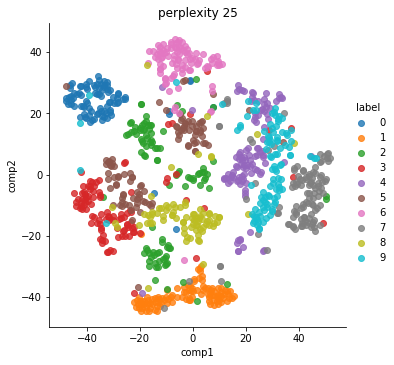

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('perplexity 25')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 346.815738
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.326553
[t-SNE] KL divergence after 1000 iterations: 0.976180


Text(0.5, 1.0, 'perplexity 5')

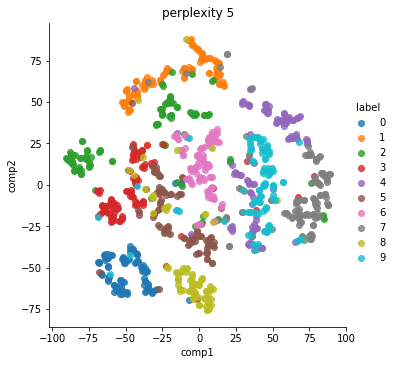

In [13]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('perplexity 5')

Reducing the perplexity only seemed to shift the clusters around, but the clusters that were overlapping in the first plot were also overlapping in the second plot. Reducing the perplexity even further just sparsed up the data points and made the clusters weaker. 

**c) How robust is it to different learning rate and number of iterations?**

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 508.780804
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.364349
[t-SNE] KL divergence after 1000 iterations: 0.982693


Text(0.5, 1.0, 'TSNE')

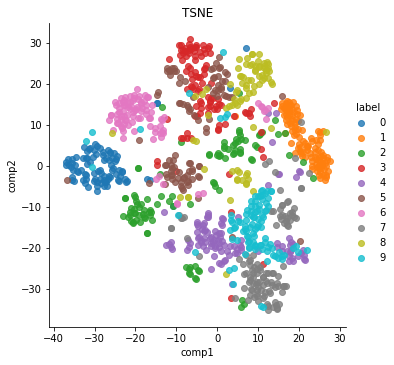

In [14]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('TSNE')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.111s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 508.780804
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.267784
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


Text(0.5, 1.0, '25% n_iter')

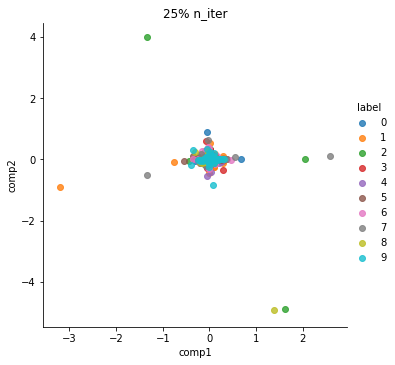

In [15]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('25% n_iter')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 508.780804
[t-SNE] KL divergence after 50 iterations with early exaggeration: 64.639351
[t-SNE] KL divergence after 1000 iterations: 0.925556


Text(0.5, 1.0, '25% learning_rate')

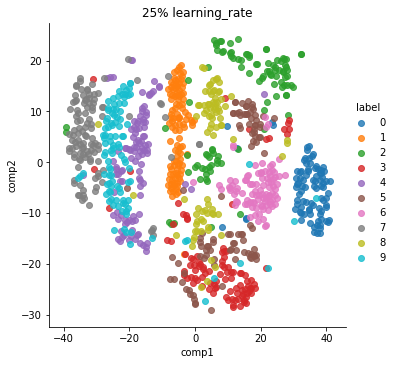

In [16]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('25% learning_rate')

Reducing iterations just destroyed the plot, perhaps becaues I took it too far. Reducing the learning rate, however, managed to cluster the purple, blue, and grey labels better than my original plot. 

## K-Means Clustering

Perform k-means clustering

**a) How did you choose k?**

I chose 10 because I figure that since there are 10 numbers there needs to be 10 groups.

**b) How did you evaluate your clustering?**

In [17]:
kmeans = KMeans(n_clusters=10, n_init=50)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_score(X, labels, metric='euclidean')

0.05862550283083209

To evaluate my clustering, I will use a silhouette score that indicates how dense and separated the clusters are. 

**c) Visualize your clusters using t-sne**

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.016s...
[t-SNE] Computed neighbors for 1000 samples in 1.310s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 623.092665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.967445
[t-SNE] KL divergence after 1000 iterations: 0.973251


Text(0.5, 1.0, 'K-Means Clustering')

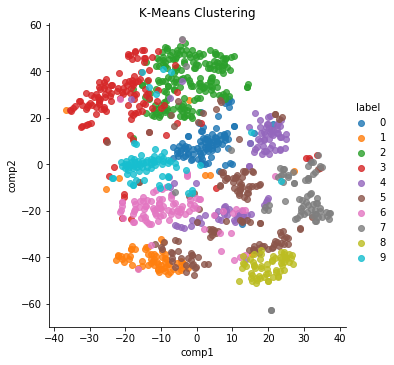

In [19]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')

**d) Did you scale your data?**

I didn't think there was a need to scale the data since all the data are on the same scale and there isn't a difference between the features. 

**e) How robust is your clustering?**

It is difficult for me to observe whether or not this is robust. I would say it has performed similarly to PCA and t-SNE, maybe even a bit better based off of the graphs.

## Hierarchical Clustering

Perform hierarchical clustering

**a) Plot your dendrogram**

Text(0.5, 1.0, 'Complete Linkage')

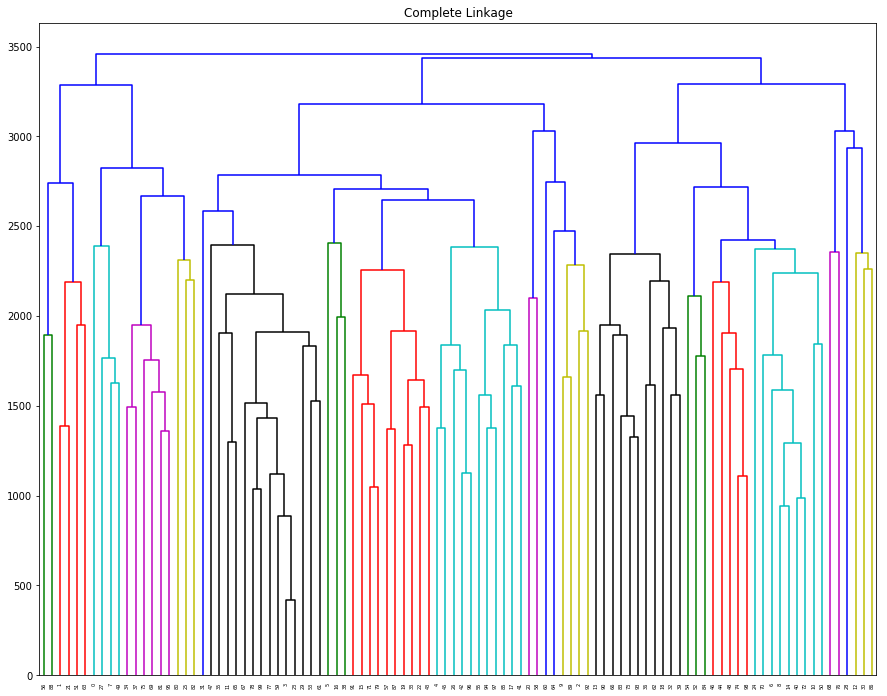

In [21]:
x_cluster = X[:100]
Z = linkage(x_cluster, 'complete')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Complete Linkage')

**b) How many clusters seem reasonable based off your graph?**

It looks like 9-10 clusters may be good looking at the 3000 mark on the y axis

**c) How does your dendrogram change with different linkage methods?**

Text(0.5, 1.0, 'Ward')

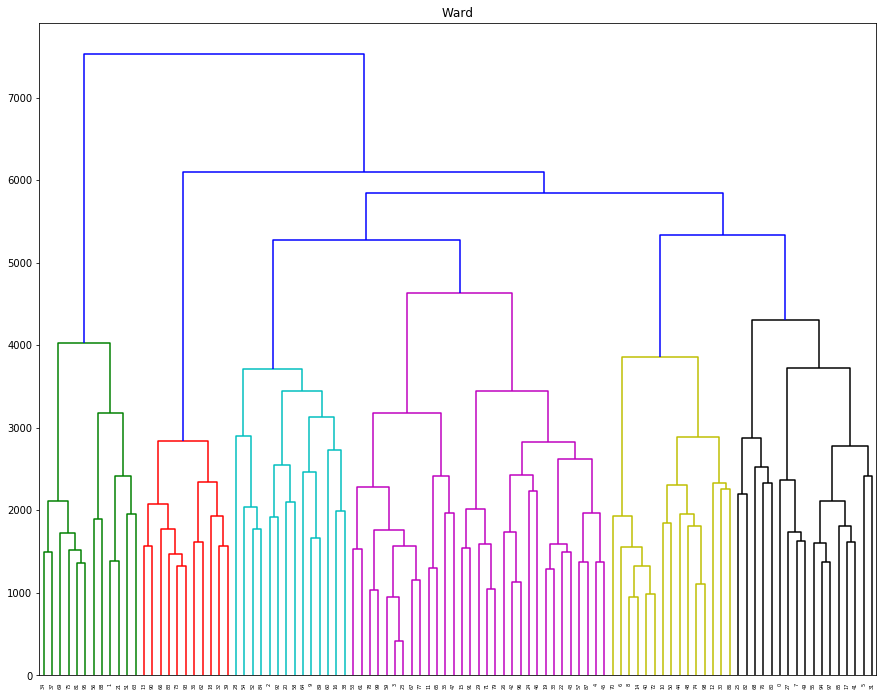

In [23]:
Z = linkage(x_cluster, 'ward')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Ward')

Ward linkage creates a lot of links with smaller heights at the bottom. It also has fewer major clusters than the complete linkage. The optimal amount of clusters is probably around 6 looking at 5000 on the y axis.

Text(0.5, 1.0, 'Average')

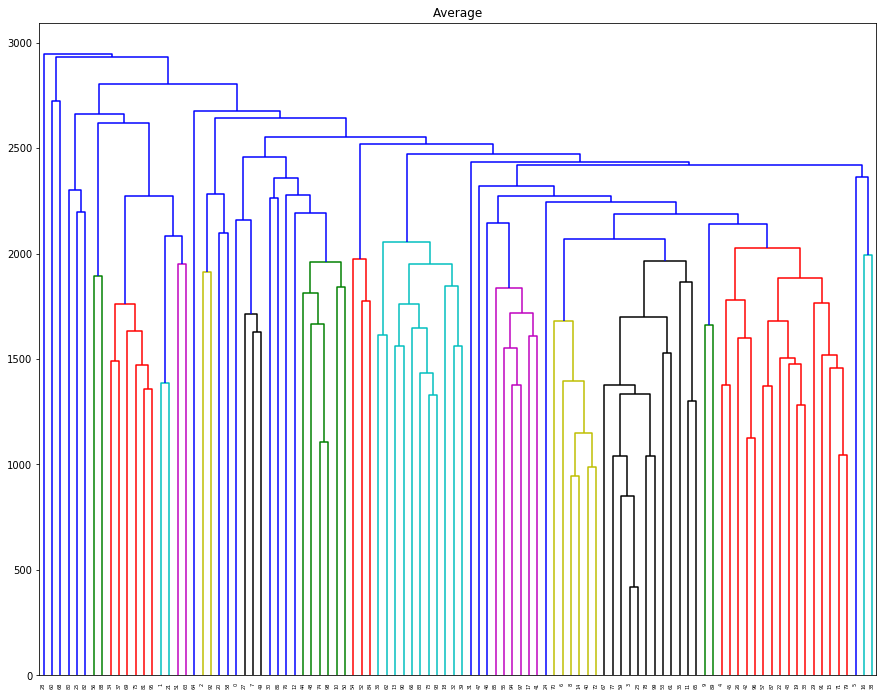

In [24]:
Z = linkage(x_cluster, 'average')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Average')

Average linkage has many more major clusters with more variety in the heights of the first clusters. It is hard to say how many clusters are optimal, but I wuold guess around 8 looking at the 2700 mark on the y axis.